# Object detection - How to make sample images for detection

We use CIFAR10 dataset for training data of classification model, but our goal is to make it possible to detect objects. So from this public images, we will produce bigger images which contains one image from CIFAR, and we use it for object detection purpose.

## Setup

In [68]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

## Data

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [8]:
label_name = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

## Explore image data

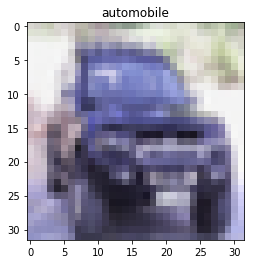

In [40]:
i = 9

sample = x_test[i]

plt.imshow(sample)
plt.title(label_name[int(y_test[i])])
plt.show()

In [41]:
sample.shape

(32, 32, 3)

In [42]:
sample[:, :, 0].shape

(32, 32)

In [43]:
sample[:, :, 0]

array([[217, 210, 205, ..., 170, 161, 162],
       [222, 221, 220, ..., 183, 186, 200],
       [234, 233, 231, ..., 202, 208, 211],
       ...,
       [162, 151, 147, ...,  98, 174, 186],
       [148, 141, 142, ..., 131, 179, 180],
       [144, 149, 160, ..., 164, 182, 186]], dtype=uint8)

In [44]:
print((sample[:, :, 0]).min())
print((sample[:, :, 0]).max())

22
250


## About RGB

https://www.w3schools.com/colors/colors_rgb.asp

## Make a bigger image

In [36]:
tensor_zero = np.zeros((32, 32, 3))
print(tensor_zero.shape)
print(x_test[i].shape)

(32, 32, 3)
(32, 32, 3)


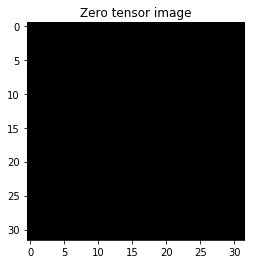

In [37]:
plt.imshow(tensor_zero)
plt.title("Zero tensor image")
plt.show()

In [67]:
tensor_255 = np.full((32, 32, 3), 255)

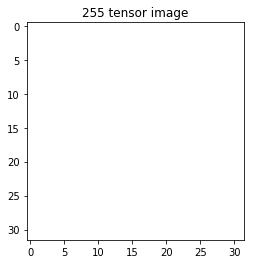

In [39]:
plt.imshow(tensor_255)
plt.title("255 tensor image")
plt.show()

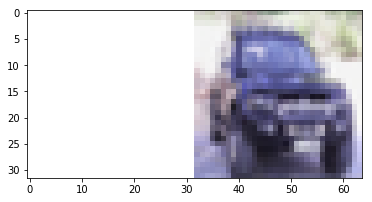

In [48]:
tmp = np.concatenate((tensor_255, sample), axis = 1)
plt.imshow(tmp)
plt.show()

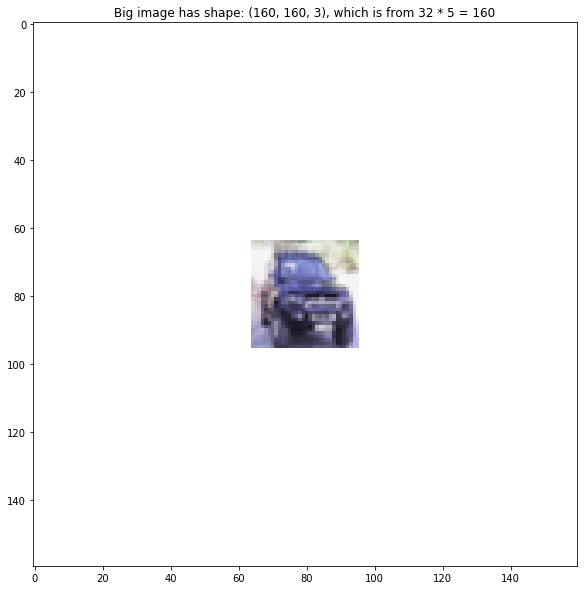

In [66]:
row_1 = np.concatenate((tensor_255, tensor_255, tensor_255, tensor_255, tensor_255), axis = 1)
row_2 = np.concatenate((tensor_255, tensor_255, tensor_255, tensor_255, tensor_255), axis = 1)
row_3 = np.concatenate((tensor_255, tensor_255, sample, tensor_255, tensor_255), axis = 1)
row_4 = np.concatenate((tensor_255, tensor_255, tensor_255, tensor_255, tensor_255), axis = 1)
row_5 = np.concatenate((tensor_255, tensor_255, tensor_255, tensor_255, tensor_255), axis = 1)

image_big = np.concatenate((row_1, row_2, row_3, row_4, row_5), axis = 0)

plt.figure(figsize = (10, 10))
plt.imshow(image_big)
plt.title("Big image has shape: {}, which is from 32 * 5 = 160".format(image_big.shape))
plt.show()

## Save array data to PNG file

In [60]:
matplotlib.image.imsave('first_task.png', image_big)